## **Ten Design Patterns in Python**
Design patterns became important in the 1990's with the advent of two books; code complete by Steve McConnell, and the more famous Design Patterns by the Gang of Four (GoF).

Despite their popularity, you could program the rest of your life perfectly fine, without knowing any of the patterns that are described in these books. Especially if you program in a dynamic language like Python. 

Still, you probably should know at least a few, if only to go through in a job interview. For even if a company never programs with a single pattern, they will probably ask you some questions about software patterns. In all honesty, several of these patterns will help you to write better software. Further, and What is good to know, you probably already program with software patterns, you just didn't know it. In these notebooks you met several patterns, dependency injection, iterators and decorators are all patterns. 

In software engineering, a software pattern is a general, reusable solution to a commonly occurring problem in software design. It is not a piece of code that you can execute, it is a description or template for how to solve a problem that can be used in many different situations. A design pattern is a formalized best practice, it is the combined experience of countless programmers on how to solve these design issues.

As for design patterns and Python let me quote Peter Norvig:
 * Dynamic Languages have fewer language limitations
 * Less need for bookkeeping objects and classes
 * Less need to get around class-restricted design
 
Python is a dynamic language C++ where the patterns originated from is not. Python offers different solutions to the same problems. In this notebook I will show you the different design patterns, but all implementations are written Pythonic, or at least what I feel is Pythonic.

#### **Dependency Injection (DI)**
Let's see a simple example of a design pattern at work. (All the design patterns are optimized for Python, in other languages you might opt for different solutions)

A common pattern (not in the GoF book, as it became popular with the advent of SOLID) is dependency injection. The problem this pattern tries to solve is how to keep classes loosely coupled. Fundamentally, dependency injection consists of passing parameters to a method.

Dependency Injection has then also three common forms:
 1. Constructor Injection
 2. Setter Injection
 3. Interface Injection
 
However, Python solves it differently it uses multiple inheritance and their clever MRO. Below is how I believe dependency injection is done in Python.

In [ ]:
# this an example from Raymond Hettinger with some adaptations by me to bring it up to todays standards
from typing import Union

class DoughFactory:
    
    def get_dough(self)->str:
        return 'insecticide treated wheat dough'
    
class Pizza(DoughFactory): 
    
    def order_pizza(self, *toppings:Union[str,list[str]])->None:
        print('getting dough')
        dough = super().get_dough() 
        print(f'making pie with {dough}')
        for topping in toppings:
            print(f'Adding {topping}')  

In [ ]:
Pizza().get_dough()

Of course, we don't want an insecticide treated pizza. 

We solve this by creating a nice OrganicDoughFactory, then we create a new class OrganicPizza, and use the MRO to redirect (or reinject if you want to) the dough dependency to our OrganicDoughFactory.


In [ ]:
class OrganicDoughFactory(DoughFactory):
    
    def get_dough(self)->str:
        return 'Pure untreated wheat dough'
    
class OrganicPizza(Pizza, OrganicDoughFactory):
    '''this class is left empty on purpose'''
    pass

In [ ]:
OrganicPizza().order_pizza('morcilla', 'radicchio')

We can see the MRO with a call to help.

In [ ]:
help(OrganicPizza)

Interface injection (via a framework like spring in Java) is the most common form of DI. The interface injection diagram.

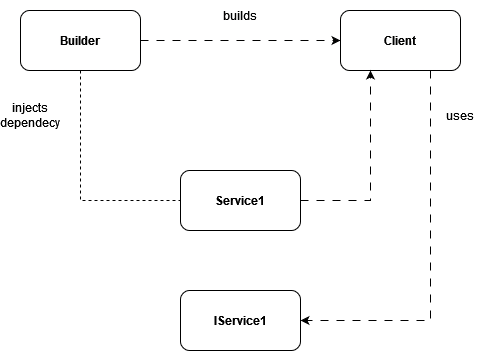

Obviously, Python solves this quite different, far less verbose meaning with a lot less boilerplate code. If you want to see how the other forms of dependency injection work, I will refer you to the SOLID notebook.


#### **Norvig's criticism on Patterns**
Peter Norvig captured my feelings about programming patterns in https://www.norvig.com/design-patterns/design-patterns.pdf. Norvig shows that sixteen of the twenty-three design patterns of the gang of four are simplified or eliminated in Lisp and Dylan. I can attest that Haskell solves these issues very differently and pays no attention to these patterns. Design patterns signal a flaw in the programming languages that programmers need to work around. 

Again, with this Norvig fellow, who is Peter Norvig? Before I answer you this, I want to bring in philosopher Karl Popper from whom I learned the importance of your sources of knowledge. I would paraphrase it as: go to an engineer if you want to build a bridge, go to a physician if you think you have disease. Peter Norvig is one of the most eminent computer-scientist alive. He is a reliable source of information on programming languages and artificial intelligence. (https://en.wikipedia.org/wiki/Peter_Norvig)

Python I feel solves many of the problems, these patterns address, inherently in it is program design. A fitting example is the way Python solves the decorator and the iterator pattern problems. However, before I show you these, we need to know a bit on the formal description of patterns. Patterns have:
 1. name
 2. An intent/purpose
 3. A problem

... and a few more of these but these three will do fine, just keep these in mind.


#### **Decorator**
*The intent* of a decorator is as we know from the Decorators and Dataclasses notebook is to enrich functions with outside behaviour. 
 
What *Problem* can it solve:
 1. Responsibilities should be added to (and removed from) an object dynamically at run-time.
 2. A flexible alternative to subclassing for extending functionality should be provided

Formally the pattern looks like:

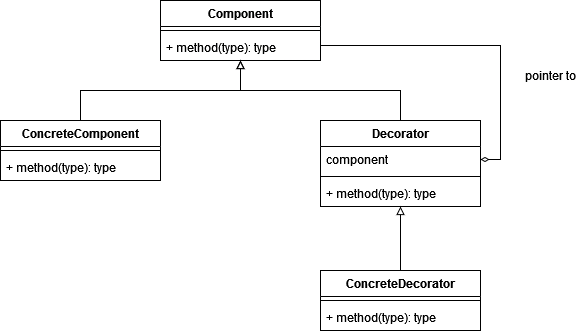

Python solves this problem by incorporating decorators in its design.

In [ ]:
from functools import wraps

def decorator(func):
    '''this the boilerplate code for a decorator in Python'''
    @wraps(func) # you need this for inspection 
    def wrapper_decorator(*args, **kwargs):
        # Do something before
        func(*args, **kwargs) # This the first time
        func(*args, **kwargs) # This is the second time
        # Do something after
        return func(*args, **kwargs) #This is the third time 
    return wrapper_decorator

@decorator
def george(name):
    '''This is George's his function'''
    print('George is a rhino!')
    return f"hi {name}!"

In [ ]:
george('Laurens')

As you can see this formal pattern is not implemented in Python (You could write your own decorator like this in Python if you wanted to). Python knows functions as first-class citizens in its program design, C++ does not. Consequently, Python simply uses decorators as higher order functions. Decorator takes the decorated as an argument, the `@decorator` ensures this. 

The diagram would look like:

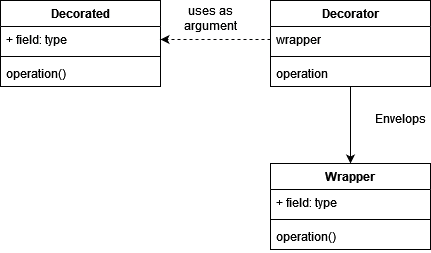

#### **Iterator**
*Intent*, provide a way to access the elements of an aggregated object sequentially without exposing its underlying representation.

What *problem* can the Iterator design pattern solve?
 1. The elements of an aggregate object should be accessed and traversed without exposing its representation (data structures).
 2. New traversal operations should be defined for an aggregate object without changing its interface.

This is a worded a bit opaque, but it isn't that complicated as we will soon see. 

First the diagram.

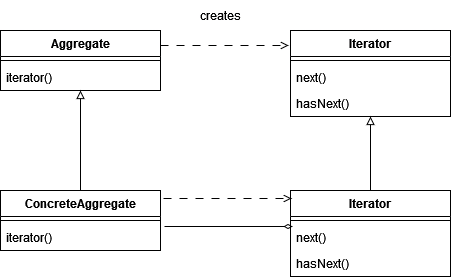

In [ ]:
import re
from dataclasses import dataclass, field 

@dataclass
class Sentence:
    text:str 
    words:list[str]=field(default_factory=list)

    def __post_init__(self):
        RE_WORD = re.compile(r'\w+')
        self.words = RE_WORD.findall(self.text) 
    
    def __repr__(self)->str:
        return f'Sentence({reprlib.repr(self.text)})' 
    
    def __iter__(self):
        for word in self.words:
            yield word

In [ ]:
sentence = Sentence('Python solves the iterator pattern with a generator')
it = iter(sentence)
next(it)

In [ ]:
next(it)

In [ ]:
next(it)

In [ ]:
for word in sentence:
    print(word)

Python solves the iterator pattern with the generator interface.

By simply using the yield keyword we have implemented the generator interface (extreme duck typing), which provides us with the next function. Python doesn't use hasNext() but uses an error to signal the end of what can be iterated over.

Usually, I would forgo the yield expression and return a generator expression instead of the yield, i.e., `return (word for word in self.words)` however using yield makes it obvious that you implement the generator interface. 

The diagram looks like:

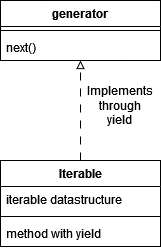

As we can see Python solves this much easier.

#### **Memoization**
Originally known as the flyweight pattern, it uses memory caching to support large numbers of similar objects efficiently.

*Intent* the flyweight pattern is useful when dealing with large numbers of objects with simple repeated elements that would use a large amount of memory if individually stored. It is common to hold shared data in external data structures and pass it to the objects temporarily when they are used. 

It has the following diagram:

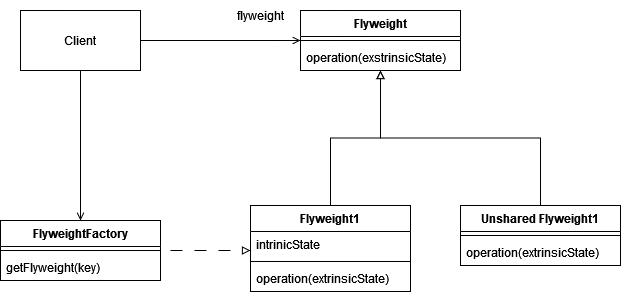

The sequence diagram shows the following run-time interactions:
 * The Client object calls getFlyweight(key) on the FlyweightFactory, which returns a Flyweight1 object.
 * After calling operation(extrinsicState) on the returned Flyweight1 object, the Client again calls getFlyweight(key) on the FlyweightFactory.
 * The FlyweightFactory returns the already-existing Flyweight1 object. For instance, n-2 in a Fibonacci sequence
This is memoization in optima forma, we store intermediate results. How do we implement memoization in Python? Simple we use a decorator.


In [ ]:
ok = 10
waiting = 40 
are_you_crazy=1000

def fib(n:int)->int:
    '''returns the n-th fibonacci number'''
    return 1 if n < 2 else fib(n-1) + fib(n-2)

In [ ]:
fib(ok)

In [ ]:
fib(waiting)

Obviously, it is not smart to ask fib for the 1000th Fibonacci we will be waiting for days and grow very hungry!

However, we could use memoization by caching the intermediate results and calculate the 1000th Fibonacci number in microseconds.

In [ ]:
from functools import cache

@cache
def fib(n:int)->int:
    '''returns the n-th fibonacci number'''
    return 1 if n < 2 else fib(n-1) + fib(n-2)

In [ ]:
fib(are_you_crazy)

The `@cache` decorator uses a hash function, and only values that are hashable can be used. A hash function is any function that can be used to map data of arbitrary size to fixed-size values, which allows for fast look up. 

If you need to work with non-hashables you probably need to write your own code, you can use memoization or you can use tabulation as in the code below.

In [ ]:
def tab_product(ns:list[int])->int:
    '''a product function that uses tabulation'''
    l = len(ns)
    tab = [None]*(l+1)
    tab[0] = 1
    for idx in range(1,l+1):
        tab[idx] = ns[idx-1] * tab[idx-1]
    return tab[l]
tab_product([1,2,3,4,5,6,7,8,9])

#### **Strategy Pattern**
*Intent* Enabling of selection of algorithm implementation at run time.

*Problem* How to let algorithms vary depending on which client uses it. 

This is one pattern that is still used a lot. Even if people don't really realize that they are using it. The diagram is:

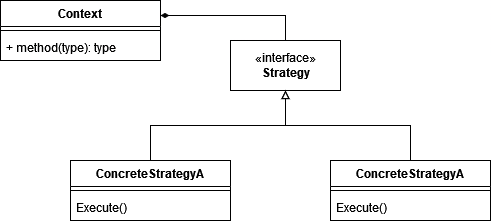

The context 

In [ ]:
from collections.abc import Sequence
from dataclasses import dataclass
from decimal import Decimal
from typing import NamedTuple


class Customer(NamedTuple):
    nr: int
    name:str
    payment_method: str 

class Item(NamedTuple):
    product_name: str
    product_description: str
    price: float

    
@dataclass
class Order:#the context
    customer: Customer
    cart:Sequence[(Item,int)]
    
    def total(self)->float:
        return sum([item.price*qty for item, qty in self.cart])

    def __len__(self)->int:
        return len(self.car)
    
    def pay(self)->bool:
        return execute_payment(self.customer, self.total())
    
        

The customers

In [ ]:
croc = Customer(nr=1,name='Croc', payment_method='invoice')
george = Customer(nr=2, name='George', payment_method='bank card')

The items

In [ ]:
blue_heron = Item(product_name='Blue Heron', product_description='Delicious bird', price=75.8)
cote_du_boeuf = Item('Cote du boeuf', 'Wonderful snacky', 32.97)
vla = Item(product_name='Hopjes vla', product_description='Lovely stuff made of milk!', price=1.24)
milk = Item(product_name= 'Milk', product_description='White moustache',price=2.15)

The orders 

In [ ]:
crocs_order = Order(customer=croc, cart=[(blue_heron,7), (cote_du_boeuf,12)])
georges_order = Order(customer=george,cart=[(vla,9), (milk, 6)])

In [ ]:
crocs_order.total()

The strategy

In [ ]:
from abc import ABC, abstractmethod

class Payment(ABC):
    @abstractmethod
    def pay(self, customer:str, amount:float)->str:
        pass

class CashPayment(Payment):
    def pay(self, customer:str, amount:float)->str:
        print(f'Dear {customer} thank you for paying you order in cash, have a nice day')
        return True
    
class InvoicePayment(Payment):

    def pay(self, customer:str, amount:float)->str:
        print(f'Dear {customer} thank you for your order we will send you an invoice for {amount}')
        return True           

class CardPayment(Payment):
    
    def pay(self, customer:str, amount:float)->str:
        print(f'Dear {customer} thank you for paying with a bank card') 
        return True    


Using the strategy to choose which algorithm to use at runtime perhaps in your script or main

In [ ]:
def execute_payment(customer:Customer, total:float)->str:
    match customer.payment_method:
        case 'cash':
            return CashPayment().pay(customer.name, total)
        case 'invoice':
            return InvoicePayment().pay(customer.name, total)
        case 'bank card':
            return CardPayment().pay(customer.name, total)
        case _: 
            print(f'Unfortunately we don`t except {customer.payment_method} as payment method')
            return False

In [ ]:
crocs_order.pay()

In [ ]:
georges_order.pay()

#### **The Pythonic strategy pattern solution**
The above solution is typically something you would do in Java or C++ in Python this over reliance on classes is obsolete. A Pythonic solution would be to put all in one class Pay and make all the other classes simple static methods.

In [ ]:
class Pay:
    
    def execute_payment(self, customer:Customer, total:float)->str:
        match customer.payment_method:
            case 'cash':
                return self.cash_pay(customer.name, total)
            case 'invoice':
                return self.invoice_pay(customer.name, total)
            case 'bank card':
                return self.card_pay(customer.name, total)
            case _: 
                print(f'Unfortunately we don`t except {customer.payment_method} as payment method')
                return False

    @staticmethod
    def cash_pay(customer:str, amount:float)->str:
        print(f'Dear {customer} thank you for paying you order in cash, have a nice day')
        return True
    
    @staticmethod
    def invoice_pay(customer:str, amount:float)->str:
        print(f'Dear {customer} thank you for your order we will send you an invoice for {amount}')
        return True 
    
    @staticmethod
    def card_pay(customer:str, amount:float)->str:
        print(f'Dear {customer} thank you for paying with a bank card') 
        return True

    
    

In [ ]:
croc = Customer(nr=1,name='Croc', payment_method='cash')
george = Customer(nr=2, name='George', payment_method='bank card')

In [ ]:
croc_order_two = Order(customer=croc, cart=[(blue_heron,2), (cote_du_boeuf,6)])
georges_order_two = Order(customer=george,cart=[(vla,9), (milk, 10)])

In [ ]:
croc_order_two.pay()

In [ ]:
georges_order_two.pay()

In [ ]:
gabor = Customer(nr=3, name='Gabor', payment_method='invoice')
gabor_order = Order(customer=gabor, cart=[(blue_heron,2), (cote_du_boeuf,1)])
gabor_order

In [ ]:
gabor_order.pay()

This code is simpler, less boilerplate and achieves the same thing; we can select (a still pretty dim) algorithm at runtime.

Notice that execute_pay functions as an API, the public part of the class. The client needs not to know nothing else from the Pay class, the client is not concerned with the implementation of the under lying methods which are kept static. Adding or changing functionality requires change in only one place. 

#### **The observer pattern**
This is an important software pattern it suits any process by which data arrives from some input that is not available to the CPU at startup, but instead arrives seemingly at random (HTTP requests, user input from peripherals, distributed databases, etc).

These days however, I venture it is only used for use with distributed databases or streams of data some sort (imagine a geo location beacon sending info at irregular intervals). The handling of websites and user input via GUI's is mostly done by the MVC pattern, which I won't discuss here, as I am not discussing GUI or Web development. See https://www.pythonguis.com/tutorials/modelview-architecture/. 

The observer pattern addresses the following problems:
 - A one-to-many dependency between objects should be defined without making the objects tightly coupled
 - When one object changes state, an open-ended number of dependent objects should be updated automatically.
 - An object can notify multiple other objects.
 
How do this? Two steps:
 1. Define `Subject` and `Observer` objects.
 2. When a subject changes state, all registered observers are notified and updated automatically (and probably asynchronously, we discuss async later).

The observer diagram looks like:

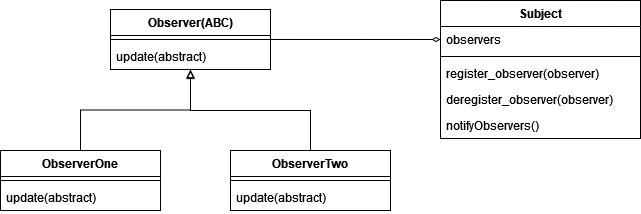

In [ ]:
from dataclasses import dataclass, field
from abc import ABC, abstractmethod

class Observer(ABC):
    
    @abstractmethod
    def update(self, observable:object, *args, **kwargs)->None:
        pass

@dataclass        
class Subject:
    observers:list[object] = field(default_factory = list)

    def register_observer(self, observer:Observer)->None:
        self.observers.append(observer)

    def notify_observers(self, *args, **kwargs)->None:
        for obs in self.observers:
            obs.update(self, *args, **kwargs)
    
@dataclass
class ObserverOne(Observer):
    '''These classes will not be called ObserverOne etc and they will probably have attributes that need updating. 
       They will however, all implement the Observer interface'''
    
    def update(self, observable:Subject, *args, **kwargs)->None:  
        print("Got", args, kwargs, "From", observable)

@dataclass
class ObserverTwo(Observer):
    
    def update(self, observable:Subject, *args, **kwargs)->None:  
        print("Got", args, kwargs, "From", observable)


subject = Subject()
observer1 = ObserverOne()
observer2 = ObserverTwo()
subject.register_observer(observer1)
subject.register_observer(observer2)    

In [ ]:
subject.notify_observers("George", kw=" is a rhino!")

The idea is simple instead of having n+1 objects continuously monitoring a source for updates, the Subject will do the monitoring.

Once the Subject receives an update it sends this update on to all n+1 observing objects (the observers) who in turn will process the information in the update. 

The key advantage is that only one object is kept busy monitoring while the rest can just happily continue their business.

#### **Factory/Creator pattern**
The factory pattern (Larman calls it creator) is a fairly simple pattern that underpins other patterns as singleton, factory method, and abstract factory pattern. 

Factory objects are used in situations where getting hold of an object of a particular kind is a more complex process than simply creating a new object. For instance, if complex allocation or initialization is desired. Some of the processes required in the creation of an object include determining which object to create, managing the lifetime of the object, and managing specialized build-up and tear-down concerns of the object.

It is a stunningly simple pattern you write method or function that creates an object.

In [ ]:
class Example:
    
    def __init__(self, text:str)->None:
        self.text = text
    
    def __str__(self)->str:
        return self.text

def factory()->Example:
    return Example('Croc is peckish!')

x = factory()
print(x)

#### **The singleton pattern**
The singleton pattern is a software design pattern that restricts the instantiation of a class to a singular instance. This pattern is useful when exactly one object is needed to coordinate actions across a system, the singleton pattern allows to:
 - Ensure classes have only one instance.
 - Provide easy access to that instance.
 - Control their instantiation (for example, hiding the constructors of a class).

In [ ]:
def factory():
    if factory.obj is None:
        factory.obj = Example('George is rhino!')
    return factory.obj

factory.obj = None

y = factory()
z = factory()
print(y)

In [ ]:
y is z 

As you can see y and z are the same objects.

#### **Factory method pattern**
This is the last pattern I will discuss. After this you should have a good feel for patterns and when to use them and when to say this pattern just solves a C++ flaw.

The central idea in Factory Method is to provide a separate component with the responsibility to decide which concrete implementation should be used based on some specified parameter. The underlying idea is to simplify code.

The pattern has three components:
 1. The client, the application code that depends on an interface to complete its task.
 2. The producer, the interface (a bunch of functions/methods).
 3. The creator, a method that chooses the which implementation to use.
 
The factory method pattern has several useful applications:
 - Constructing related objects from external data.
 - Replacing complex logical code.
 - Supporting multiple implementations of the same feature: 
 - Combining similar features under a common interface: e.g., an application needs to apply a filter to an image. The specific filter to use can be identified by some user input, and the factory method can provide the concrete filter implementation.
 - Integrating related external services, for instance you want to build your own TV app of all the streaming services you are a member of. 

The factory method diagram looks like:

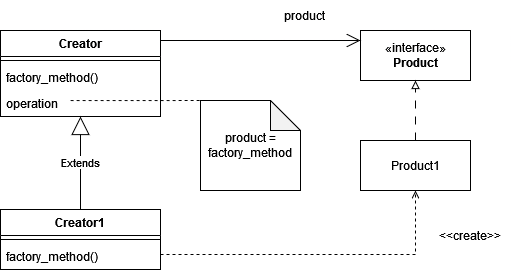

As you can see, it is remarkably similar to the strategy pattern. So, let's continue with that, and expand or logic a bit, just to keep it interesting.

#### The context

In [ ]:
from collections.abc import Sequence
from dataclasses import dataclass
from decimal import Decimal
from typing import NamedTuple, Optional, Union
from collections.abc import Callable


class Customer(NamedTuple):
    nr: int
    name:str
    payment_method: str 

class Item(NamedTuple):
    product_name: str
    product_description: str
    price: float

    
@dataclass
class Order:#the context
    customer: Customer
    cart:Sequence[(Item,int)]
    total:Decimal=None
    paid:bool=False
       
    def calculate_total(self)->None:
        self.total = Decimal(str(sum([item.price*qty for item, qty in self.cart])))

    def __len__(self)->int:
        return len(self.car)
    
    def pay(self, amount)->Optional[str]:
        self.calculate_total() # ensure order is totaled
        if Pay().payment(self, amount):
            self.paid = True
        else:
            return f'There is still {self.total - amount} due'
    

The factory

In [ ]:
class Pay:
    
    #the client
    def payment(self, order:Order, amount:float)->bool:
        method = self._get_method(order.customer.payment_method)
        return method(order, amount)
        
    
    # the creator 
    def _get_method(self, payment_method)->Callable[[Order,float],bool]:
        match payment_method:
            case 'cash':
                return self.cash_pay
            case 'invoice':
                return self.invoice_pay
            case 'bank card':
                return self.card_pay
            case _: 
                return self.unknown_pay
               

    # the interface            
    @staticmethod
    def cash_pay(order:Order, amount:float)->bool:
        if amount >= order.total:
            print(f'Dear {order.customer.name} thank you for order in cash, your change is {amount-order.total}, have a nice day')
            return True
        else:
            print(f'Dear {order.customer.name} thank you for order in cash, however there is still {order.total - amount} due')
            return False
            
    
    @staticmethod
    def invoice_pay(order:Order, amount:float)->bool:
        print(f'Dear {order.customer.name} thank you for your order we will send you an invoice for {amount}')
        return True 
    
    @staticmethod
    def card_pay(corder:Order, amount:float)->bool:
        print(f'Dear {order.customer.name} thank you for paying with a bank card') 
        return True
    
    @staticmethod
    def unknown_pay(order:Order, amount)->bool:
        print(f'Dear {order.customer.name} we don`t accept {order.customer.payment_method} as payment method please use anthor method to pay the amount of {order.total} due')
        return False

Before you play with the code a few remarks:

This is pretty much the manner in which you would program the strategy pattern in Python however we added a client. And the code that makes the choice is now a factory, it returns the method the client uses.

The factory method pattern could easily be adapted to be factory of objects instead of methods. 

I opted to not write an interface as I don't see the added benefit here, but you could group these methods in a class which could implement an interface on top of that. In this example this looks like code bloat to me. 

There is often a debate when to write a function and when to write a method. The common answer is if you need the self, you write a method, if not you right a function. 

I think that distinction is too easy. If you write a script then you should write a function, if you write pure OO and everything is a class then use a static method. Here it made sense to encapsulate it in a class and use static methods. This kept the code small and manageable.


In [ ]:
croc = Customer(nr=1,name='Croc', payment_method='invoice')
george = Customer(nr=2, name='George', payment_method='bank card')
gabor = Customer(nr=3, name='Gabor the Gator', payment_method='cash')
laurens = Customer(nr=4, name='Laurens', payment_method='wild thievery')
cote_du_boeuf = Item('Cote du boeuf', 'Wonderful snacky', 32.97)
fish = Item(product_name= 'Fish', product_description='Water snacky',price=12.12)
vla = Item(product_name='Hopjes vla', product_description='Lovely stuff made of milk!', price=1.24)
milk = Item(product_name= 'Milk', product_description='White moustache',price=2.15)
iwc = Item(product_name= 'IWC watch', product_description='Stupidly expensive watch',price=210000)
blue_heron = Item(product_name='Blue Heron', product_description='Delicious bird', price=75.8)
crocs_order = Order(customer=croc, cart=[(blue_heron,7), (cote_du_boeuf,12)])
georges_order = Order(customer=george,cart=[(vla,9), (milk, 6)])
gabors_order = Order(customer=gabor, cart=[(fish,3), (cote_du_boeuf,12)])
laurens_order = Order(customer=laurens, cart=[(iwc,20)])
crocs_order.calculate_total()
georges_order.calculate_total()
gabors_order.calculate_total()
laurens_order.calculate_total()

In [ ]:
crocs_order.total

In [ ]:
georges_order.total

In [ ]:
gabors_order.total

In [ ]:
laurens_order.total

In [ ]:
gabors_order.pay(432)

In [ ]:
gabors_order.pay(450)

In [ ]:
laurens_order.pay(25)

In [ ]:
laurens_order.paid

#### **the command pattern**
No, I didn't lie, I am not going to discuss the command pattern. I do want you to have a quick look at the C# code on the Wikipedia page https://en.wikipedia.org/wiki/Command_pattern. There is no need to understand the code itself but just look how verbose it is.

This is the diagram:

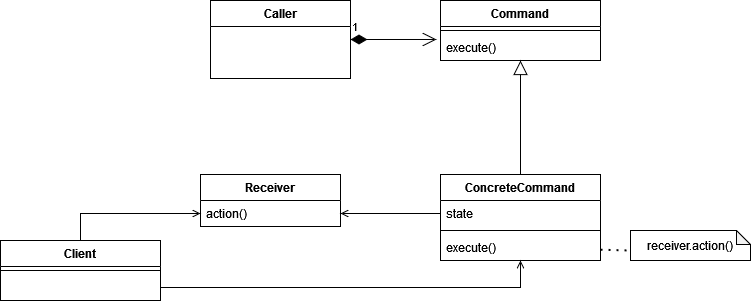

With these things in mind, I want you to see how Luciano Ramalho of Fluent Python solves this in Python (I made one slight change, I added `*` to `*commands`)

In [ ]:
class MacroCommand:
    '''an object that executues a list of commands'''
    
    def __init__(self, *commands):
        self.commands = list(commands) # building a list of the commands makes them iterable
        
    def __call__(self):
        for command in self.commands: # when MarcoCommand() is invoked each command in self.commands is called in sequence
            command()
            

In [ ]:
mc = MacroCommand(print('george is a rhino'), print('Croc is peckish!'), print('This is the last pattern, I promise'))

There is valuable lesson here. It is Peter Norvig's lesson that many a programming pattern is to overcome a flaw in language design. 

Python has a highly active core development team that overcomes many of issues the Gang of Four were confronted with. Try to solve things Pythonic, and the Python compiler will solve most of these issues for you.

#### **The End**